# Emotion dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
import random
import glob
import shutil 
import numpy as np
import matplotlib.pyplot as plt

## Augmenting ~ 11,000 images for the angry class from training set 

In [4]:
train_path = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\angry'

gen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1,
                        height_shift_range = 0.1, shear_range = 0.15, zoom_range = 0.1, horizontal_flip = True)

#Note batch size is 1000. loop each image 10 times and that = 11,000
aug_iter = gen.flow_from_directory(directory=train_path, target_size = (48,48), save_to_dir = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\angry',save_prefix ='aug-image-', save_format = 'PNG', batch_size = 1000, color_mode = 'grayscale')

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(11)]

Found 0 images belonging to 0 classes.


### Showing an example image followed by augmentations from the angry class

(1, 48, 48, 1)

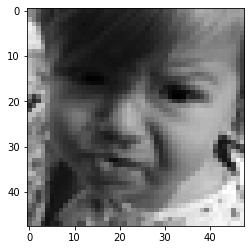

In [245]:
#will choose an image randomely from the path and final directory specified 
chosen_image = random.choice(os.listdir('C:\\Users\\Jamie\\jupyter notebooks\\Emotion_detection2\\train\\angry\\angry1'))

#setting the image path to whatever was the chosen image on disc
#adds the chosen_image filename onto the end of the path
image_path = 'C:\\Users\\Jamie\\jupyter notebooks\\Emotion_detection2\\train\\angry\\angry1\\' + chosen_image

# Obtain image 
# imread is for reading an image from disc, imshow is for displaying an image in memory
image = np.expand_dims(plt.imread(image_path), axis = 0) #expands dimensions from 48,48 to 1,48,48
plt.imshow(image[0], cmap='gray')
image.shape

#only had 3 dimensions and needed to add the gray dimension as 1 for later

if image.ndim == 3:
    image = np.expand_dims(image, axis=3)
    
image.shape

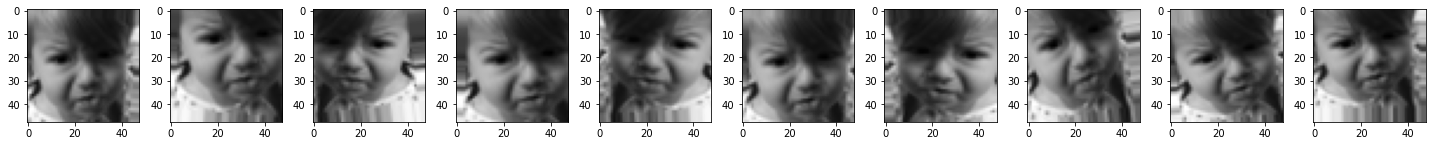

In [281]:
#Generating batch of augmented images
#channel shift range was giving weird effects so set to 0 (think was just changing the brightness and made some images appear black)
gen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1,
                        height_shift_range=0.1, shear_range=0.15, zoom_range = 0.1,
                        channel_shift_range=0, horizontal_flip = True)

aug_iter = gen.flow(image)

#note: converting to float solved the problem of the images appearing black
aug_images = [next(aug_iter)[0].astype(np.float) for i in range(10)]

# this function will plot images in the form of a grid with 1 row and 10 columns where images are
# directly from tensorflow's website and allows us to plot images to jupyter notebook

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0], cmap = 'gray')
        ax.axis('on')
    plt.tight_layout()
    plt.show()

plotImages(aug_images)

## Augmenting 11,000 images for the fearful class from training set

In [7]:
train_path = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\fearful'

gen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1,
                        height_shift_range = 0.1, shear_range = 0.15, zoom_range = 0.1, horizontal_flip = True)

aug_iter = gen.flow_from_directory(directory=train_path, target_size = (48,48), save_to_dir = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\fearful',save_prefix ='aug-image-', save_format = 'PNG', batch_size = 1000, color_mode = 'grayscale')

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(13)]

Found 4096 images belonging to 2 classes.


## Augmenting 7800 images for the happy class from training set

In [10]:
train_path = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\happy'

gen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1,
                        height_shift_range = 0.1, shear_range = 0.15, zoom_range = 0.1, horizontal_flip = True)

aug_iter = gen.flow_from_directory(directory=train_path, target_size = (48,48), save_to_dir = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\happy',save_prefix ='aug-image-', save_format = 'PNG', batch_size = 3900, color_mode = 'grayscale')

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(2)]

Found 7215 images belonging to 2 classes.


## Augmenting 10,000 images for the neutral class from training set 

In [12]:
train_path = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\neutral'

gen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1,
                        height_shift_range = 0.1, shear_range = 0.15, zoom_range = 0.1, horizontal_flip = True)

aug_iter = gen.flow_from_directory(directory=train_path, target_size = (48,48), save_to_dir = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\neutral',save_prefix ='aug-image-', save_format = 'PNG', batch_size = 2000, color_mode = 'grayscale')

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(6)]

Found 4965 images belonging to 2 classes.


## Augmenting 10,000 images for the sad class from training set

In [13]:
train_path = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\sad'

gen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1,
                        height_shift_range = 0.1, shear_range = 0.15, zoom_range = 0.1, horizontal_flip = True)

aug_iter = gen.flow_from_directory(directory=train_path, target_size = (48,48), save_to_dir = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\sad',save_prefix ='aug-image-', save_format = 'PNG', batch_size = 2000, color_mode = 'grayscale')

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(6)]

Found 4830 images belonging to 2 classes.


## Augmenting 12,000 images for the surprised class from training set

In [16]:
train_path = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\surprised'

gen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1,
                        height_shift_range = 0.1, shear_range = 0.15, zoom_range = 0.1, horizontal_flip = True)

aug_iter = gen.flow_from_directory(directory=train_path, target_size = (48,48), save_to_dir = 'C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\surprised',save_prefix ='aug-image-', save_format = 'PNG', batch_size = 3000, color_mode = 'grayscale')

aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(7)]

Found 3171 images belonging to 2 classes.


# Creating validation sets for each class

## Sampling images from training set and placing validation set (angry class)

In [17]:
# Sample 1/10 of data from each class and put in corresponding validation set

os.chdir("C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\angry")

if os.path.isdir("valid") is False:
    os.makedirs("valid")
    
    for image in random.sample(glob.glob("im*"),1500):
        shutil.move(image, 'valid')

## Sampling images from the training set and placing into validation set (fearful class)

In [18]:
os.chdir("C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\fearful")

if os.path.isdir('valid') is False:
    os.makedirs('valid')
    for image in random.sample(glob.glob("im*"), 1500):
        shutil.move(image,'valid')

## Sampling images from the training set and placing into validation set (happy class)

In [19]:
os.chdir("C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\happy")

if os.path.isdir("valid") is False:
    os.makedirs('valid')
    for image in random.sample(glob.glob("im*"), 1500):
        shutil.move(image, 'valid')

## Sampling images from the training set and placing into validation set (neutral class)

In [20]:
os.chdir("C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\neutral")

if os.path.isdir("valid") is False:
    os.makedirs('valid')
    for image in random.sample(glob.glob("im*"), 1500):
        shutil.move(image, 'valid')

## Sampling images from training set and placing into validation set (sad class)

In [21]:
os.chdir("C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\sad")

if os.path.isdir("valid") is False:
    os.makedirs('valid')
    for image in random.sample(glob.glob("im*"), 1500):
        shutil.move(image, 'valid')


## Sampling images from training set and placing into validation set (surprised class)

In [22]:
os.chdir("C:\\Users\\Jamie\\Jupyter notebooks\\Emotion_detection2\\train\\surprised")
if os.path.isdir("valid") is False:
    os.makedirs('valid')
    for image in random.sample(glob.glob("im*"), 1500):
        shutil.move(image, 'valid')

# Preparing data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools 
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
%matplotlib inline

In [2]:
#Creating a variable path for train, valid and test sets 

train_path = 'C:\\Users\\jamie\\jupyter notebooks\\Emotion_detection2\\train'

valid_path = 'C:\\Users\\jamie\\jupyter notebooks\\Emotion_detection2\\valid'

test_path = 'C:\\Users\\jamie\\jupyter notebooks\\Emotion_detection2\\test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(directory = train_path, target_size = (48,48), classes = ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised'], batch_size = 32, color_mode = 'grayscale')

valid_batches = ImageDataGenerator().flow_from_directory(directory = valid_path, target_size = (48,48), classes = ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised'], batch_size = 32, color_mode = 'grayscale')

test_batches = ImageDataGenerator().flow_from_directory(directory = test_path, target_size = (48,48), classes = ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised'], batch_size = 32, shuffle = False, color_mode = 'grayscale')

Found 79405 images belonging to 6 classes.
Found 9000 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


# Building and training a CNN

In [5]:
#Note models start at model2

model2 = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding ='same', input_shape = (48,48,1)),
    BatchNormalization(),
    MaxPool2D(pool_size =(2,2), strides =2),
    
    Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2), strides = 2),
        
    Flatten(),
    
    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(32, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(units = 6, activation = 'softmax'),
         
])

lr_reducer = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose = 1)

early_stopper = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, mode='auto', verbose = 1)

model2.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.fit(x = train_batches, validation_data= valid_batches, epochs = 50, verbose = 2, callbacks = [lr_reducer, early_stopper])



Epoch 1/50
2482/2482 - 1368s - loss: 2.1753 - accuracy: 0.2271 - val_loss: 1.6530 - val_accuracy: 0.3389
Epoch 2/50
2482/2482 - 593s - loss: 1.7824 - accuracy: 0.2846 - val_loss: 1.4942 - val_accuracy: 0.4043
Epoch 3/50
2482/2482 - 494s - loss: 1.6230 - accuracy: 0.3354 - val_loss: 1.4480 - val_accuracy: 0.4213
Epoch 4/50
2482/2482 - 509s - loss: 1.5401 - accuracy: 0.3718 - val_loss: 1.3893 - val_accuracy: 0.4374
Epoch 5/50
2482/2482 - 504s - loss: 1.4894 - accuracy: 0.3976 - val_loss: 1.3516 - val_accuracy: 0.4659
Epoch 6/50
2482/2482 - 615s - loss: 1.4454 - accuracy: 0.4193 - val_loss: 1.3339 - val_accuracy: 0.4852
Epoch 7/50
2482/2482 - 435s - loss: 1.4085 - accuracy: 0.4374 - val_loss: 1.3310 - val_accuracy: 0.4830
Epoch 8/50
2482/2482 - 579s - loss: 1.3733 - accuracy: 0.4569 - val_loss: 1.2851 - val_accuracy: 0.5050
Epoch 9/50
2482/2482 - 993s - loss: 1.3462 - accuracy: 0.4713 - val_loss: 1.2968 - val_accuracy: 0.4923
Epoch 10/50
2482/2482 - 516s - loss: 1.3200 - accuracy: 0.4842 

## Model 2

In [4]:
#Adding an extra layer block for the CNN and fully connected layers
#Also reducing dropout rate as the neurons reduce in the fully connected layers.

model3 = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding ='same', input_shape = (48,48,1)),
    BatchNormalization(),
    MaxPool2D(pool_size =(2,2), strides =2),
    
    Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2), strides = 2),
    
    Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2,2), strides = 2),
        
    Flatten(),
    
    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(32, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(16, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(units = 6, activation = 'softmax'),
         
])

learn_reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose = 1)

early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, mode='auto', verbose = 1)

model3.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.fit(x = train_batches, validation_data= valid_batches, epochs = 50, verbose = 2, callbacks = [learn_reduce, early_stop ])

Epoch 1/50
2482/2482 - 6363s - loss: 1.9584 - accuracy: 0.2114 - val_loss: 1.7200 - val_accuracy: 0.2827
Epoch 2/50
2482/2482 - 1175s - loss: 1.7707 - accuracy: 0.2472 - val_loss: 1.6591 - val_accuracy: 0.3053
Epoch 3/50
2482/2482 - 447s - loss: 1.6939 - accuracy: 0.2812 - val_loss: 1.5725 - val_accuracy: 0.3594
Epoch 4/50
2482/2482 - 406s - loss: 1.6172 - accuracy: 0.3270 - val_loss: 1.4918 - val_accuracy: 0.3983
Epoch 5/50
2482/2482 - 328s - loss: 1.5546 - accuracy: 0.3622 - val_loss: 1.4319 - val_accuracy: 0.4314
Epoch 6/50
2482/2482 - 304s - loss: 1.5028 - accuracy: 0.3889 - val_loss: 1.3921 - val_accuracy: 0.4424
Epoch 7/50
2482/2482 - 314s - loss: 1.4565 - accuracy: 0.4098 - val_loss: 1.3490 - val_accuracy: 0.4652
Epoch 8/50
2482/2482 - 286s - loss: 1.4209 - accuracy: 0.4281 - val_loss: 1.3197 - val_accuracy: 0.4781
Epoch 9/50
2482/2482 - 272s - loss: 1.3881 - accuracy: 0.4458 - val_loss: 1.2991 - val_accuracy: 0.4839
Epoch 10/50
2482/2482 - 343s - loss: 1.3561 - accuracy: 0.4595

### Saving the model 

In [8]:
import os.path
os.getcwd()

#h5 extension file is where model is stored
if os.path.isfile("C:\\Users\\jamie\\jupyter notebooks\\Emotion_detection2\\model3.h5") is False:
    model3.save("C:\\Users\\jamie\\jupyter notebooks\\Emotion_detection2\\model3.h5")

## Loading the model back in to predict the test set 

In [5]:
from tensorflow.keras.models import load_model
model = load_model("C:\\Users\\jamie\\jupyter notebooks\\Emotion_detection2\\model3.h5")

# Predicting 

In [16]:
predictions = model.predict(x = test_batches, verbose = 0)

#creating confusion matrix
cm = confusion_matrix(y_true=test_batches.classes, y_pred = np.argmax(predictions, axis = -1))


## plot function 

In [7]:
# from scikit-learn

def plot_confusion_matrix(cm,classes, normalize=False, title = 'Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize = True'
   
   """
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j]> thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [8]:
test_batches.class_indices

{'angry': 0, 'fearful': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprised': 5}

Confusion matrix, without normalization
[[ 470   65   83  160  158   22]
 [ 151  301   73  176  242   81]
 [  70   46 1406  123   96   33]
 [  87   72  119  706  230   19]
 [ 162   98  107  290  573   17]
 [  35  123   60   81   27  505]]


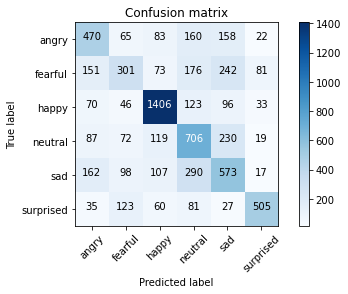

In [10]:
#Since we know the labels, we will create confusion matrix labels 

cm_plot_lab = ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
plot_confusion_matrix(cm=cm, classes = cm_plot_lab, title = "Confusion matrix")

# Measuring accuracy for each class 

In [39]:
total_accuracy = (470 + 301 + 1406 + 706 + 573 + 505)/(7067)
print("total accuracy:",total_accuracy)

angry_accuracy = (470)/(958)
print("angry accuracy:",angry_accuracy)

fearful_accuracy = (301)/(1024)
print("fearful accuracy:", fearful_accuracy)

happy_accuracy = (1406)/(1774)
print("happy accuracy:", happy_accuracy)

neutral_accuracy = (706)/(1233)
print("neutral accuracy:", neutral_accuracy)

sad_accuracy = (573)/(1247)
print("sad accuracy:", sad_accuracy)

surprised_accuracy = (505)/(831)
print("surprised accuracy:", surprised_accuracy)

total accuracy: 0.5604924296023772
angry accuracy: 0.4906054279749478
fearful accuracy: 0.2939453125
happy accuracy: 0.7925591882750845
neutral accuracy: 0.5725871857258719
sad accuracy: 0.4595028067361668
surprised accuracy: 0.6077015643802648
